# Measuring the Effects of Direct Marketing Campaigns on Bank Client Subscriptions

James Huvenaars (30031411), Ethan Scott (30117295), Bo Li (30212597), Brian Ho (30222881)

# Intro

In our daily lives, we are constantly exposed to various businesses vying for our attention through diverse creative channels. Measuring the impact of marketing efforts and determining the return on investment poses a challenge for businesses. In the contemporary landscape, the influence of social media platforms in shaping decision-making processes is undeniable. However, reflecting on the not-so-distant past, where direct phone campaigns stood tall as formidable marketing tools, reigning supreme from 2000 to the early 2010s, is intriguing. Beyond their role in marketing and sales, these direct phone calls were hailed as a beacon of cost efficiency, emerging as a paramount method for collecting invaluable primary consumer data. The methods may change from the relational depth of direct phone interactions to the expansive reach of social media, but the essence of understanding and connecting with consumers endures.


We aim to address these challenges by leveraging the marketing data from the Portuguese National Bank's direct campaigns to promote bank term deposits. We seek to explore and comprehend this dataset, ultimately constructing a predictive model that identifies the pivotal factors influencing client subscriptions.



# Dataset

The dataset encompasses information from 17 actual marketing campaigns conducted related to direct marketing campaigns of a Portuguese banking institution between May 2008 and November 2010. These campaigns involved direct calls from the bank's call center to prospective clients, offering enticing long-term deposit applications with favourable interest rates. The target variable signifies the campaign's success, indicating whether the prospective client subscribed to a term bank deposit.

The dataset is housed on OpenML (n.d.) but was initially gathered and researched by Moro, Cortez, & Laureano. (2011)

The variables measured in the dataset and their corresponding descriptions are below:

|Variable Name|Description||
|---|---|---|
|age|Prospective Client’s Age|
|job|Type of job (categorical: "admin," "unknown," "unemployed," "management," "housemaid," "entrepreneur," "student," "blue-collar," "self-employed," "retired," "technician," "services.")|
|marital|Marital status (categorical: "married," "divorced," "single"; note: "divorced" means divorced or widowed)|
|education|Categorical: "unknown," "secondary," "primary," "tertiary")|
|default|Has credit in default? (binary: "yes", "no")|
|balance|Average yearly balance, in euros (numeric)|
|housing|Has housing loan? (binary: "yes", "no")|
|loan|Has a personal loan? (binary: "yes", "no")|
|contact|Contact communication type (categorical: "unknown," "telephone," "cellular")|
|day|Last contact day of the month (numeric)|
|month|Last contact month of the year (categorical: "Jan," "Feb," "Mar,"..., "Nov," "Dec.")|
|duration|Last contact duration, in seconds (numeric)|
|campaign|Number of contacts performed during this campaign and for this client (numeric, includes the last contact)|
|pdays|Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)|
|previous|Number of contacts performed before this campaign and for this client (numeric)|
|poutcome|The outcome of the previous marketing campaign (categorical: "unknown," "other," "failure," "success")|
|y|Has the client subscribed to a term deposit? (binary: "yes", "no")|



# Objectives

Based on the provided dataset, our central objective is to identify the most effective model for predicting successful client subscriptions in response to direct marketing campaigns. We will evaluate various candidate models constructed using different statistical approaches. The selected model aims to enhance the bank's ability to forecast and understand the factors driving successful subscriptions. This insight will contribute to refining future direct marketing strategies, benefitting both the bank and prospective clients.

# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, accuracy_score, classification_report, make_scorer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, minmax_scale, StandardScaler
from yellowbrick.classifier import ConfusionMatrix
import warnings

In [ ]:
df = pd.read_excel("https://github.com/bakkiuho/DATA606_project/raw/main/bank-full.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Cleaning

In [ ]:
df.isna().sum().sum()

0

There are no nulls in the dataset that need to be removed or dealt with.

In [ ]:
#renaming columns for ease of interpretation
rename_columns = {"job": "type_of_job",
                  "marital": "marital_status",
                  "education": "education_level",
                  "default": "default_status",
                  "balance": "average_yearly_balance",
                  "housing": "housing_loan_status",
                  "loan": "personal_loan_status",
                  "contact": "contact_type",
                  "day": "last_contact_day_of_month",
                  "month": "last_contact_month_of_year",
                  "duration": "last_contact_duration",
                  "campaign": "number_of_contacts_performed_during_this_campaign",
                  "pdays": "days_after_last_contact",
                  "previous": "number_of_contacts_performed_before_this_campaign",
                  "poutcome": "previous_campaign_outcome",
                  "y": "subscription"}

df = df.rename(columns=rename_columns)
df.head()

,age,type_of_job,marital_status,education_level,default_status,average_yearly_balance,housing_loan_status,personal_loan_status,contact_type,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_contacts_performed_during_this_campaign,days_after_last_contact,number_of_contacts_performed_before_this_campaign,previous_campaign_outcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Analysis

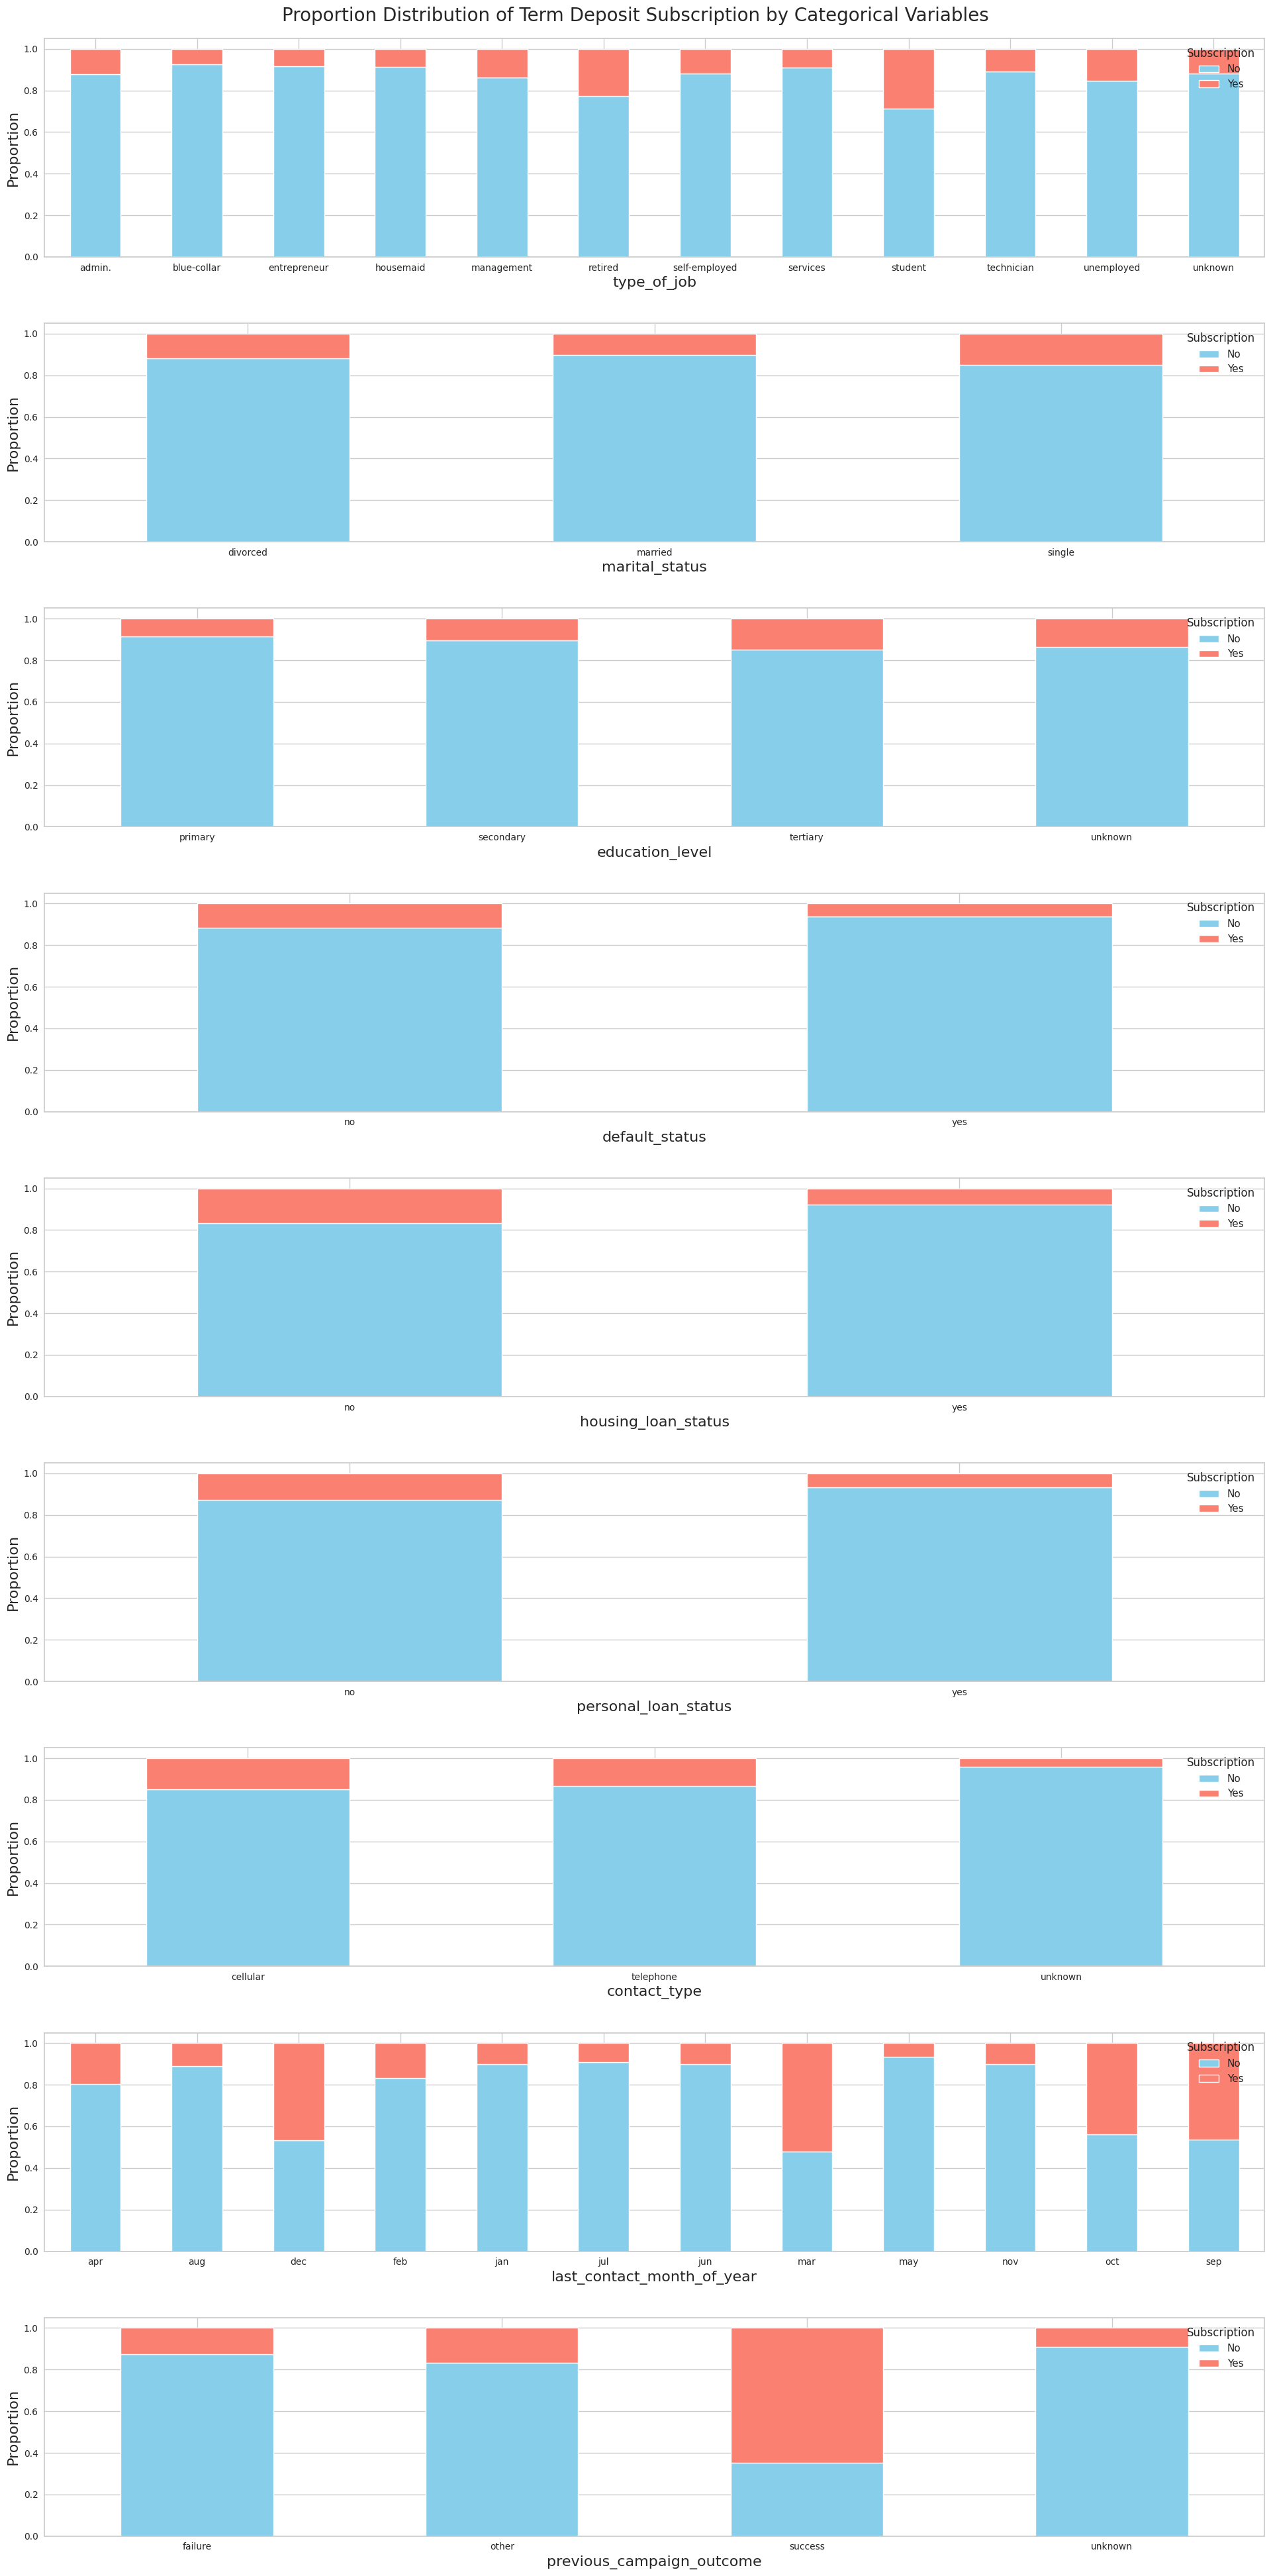

In [ ]:
# Plot the distribution of y by each categorical column
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.columns

custom_palette = ["skyblue" , "salmon"]

fig, axes = plt.subplots(nrows=len(categorical_columns.columns[:-1]), ncols=1, figsize=(20, 40),  sharex=False, sharey=False)
fig.suptitle('Proportion Distribution of Term Deposit Subscription by Categorical Variables', fontsize=20)

for i, col in enumerate(categorical_columns.columns[:-1]):
    contingency_table = pd.crosstab(df[col], df["subscription"], normalize='index') # create contingency table
    sns.set(style="darkgrid")
    contingency_table.plot(kind='bar', stacked=True, color=custom_palette, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)
    axes[i].set_ylabel("Proportion", fontsize=16)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    axes[i].legend(title="Subscription", loc='upper right', labels=['No', 'Yes'])

plt.tight_layout(pad=3)
plt.show()

From above visualization, we can inspect some interesting outcomes as below:
- among all values in "job" variable, "student" and "retired" had the highest subscription ratio
- among all values in "Marital" variable, "single" had the highest subscription ratio
- among all values in "education" variable, "tertiary", also known as post-secondary, and "unknown" had the highest subscription ratio
- among all values in "default" variable, "no",which means no outstanding loans, had the highest subscription ratio
- among all values in "housing_loan" variable, "no",which means no outstanding loans, had the highest subscription ratio
- among all values in "personal_loan" variable, "no",which means no outstanding loans, had the highest subscription ratio
- among all values in "previous campaign outcome" variable, "March" and "Sep" and Dec" had the highest subscription ratio
- among all values in "previous campaign outcome" variable, "success" ones had the highest subscription ratio

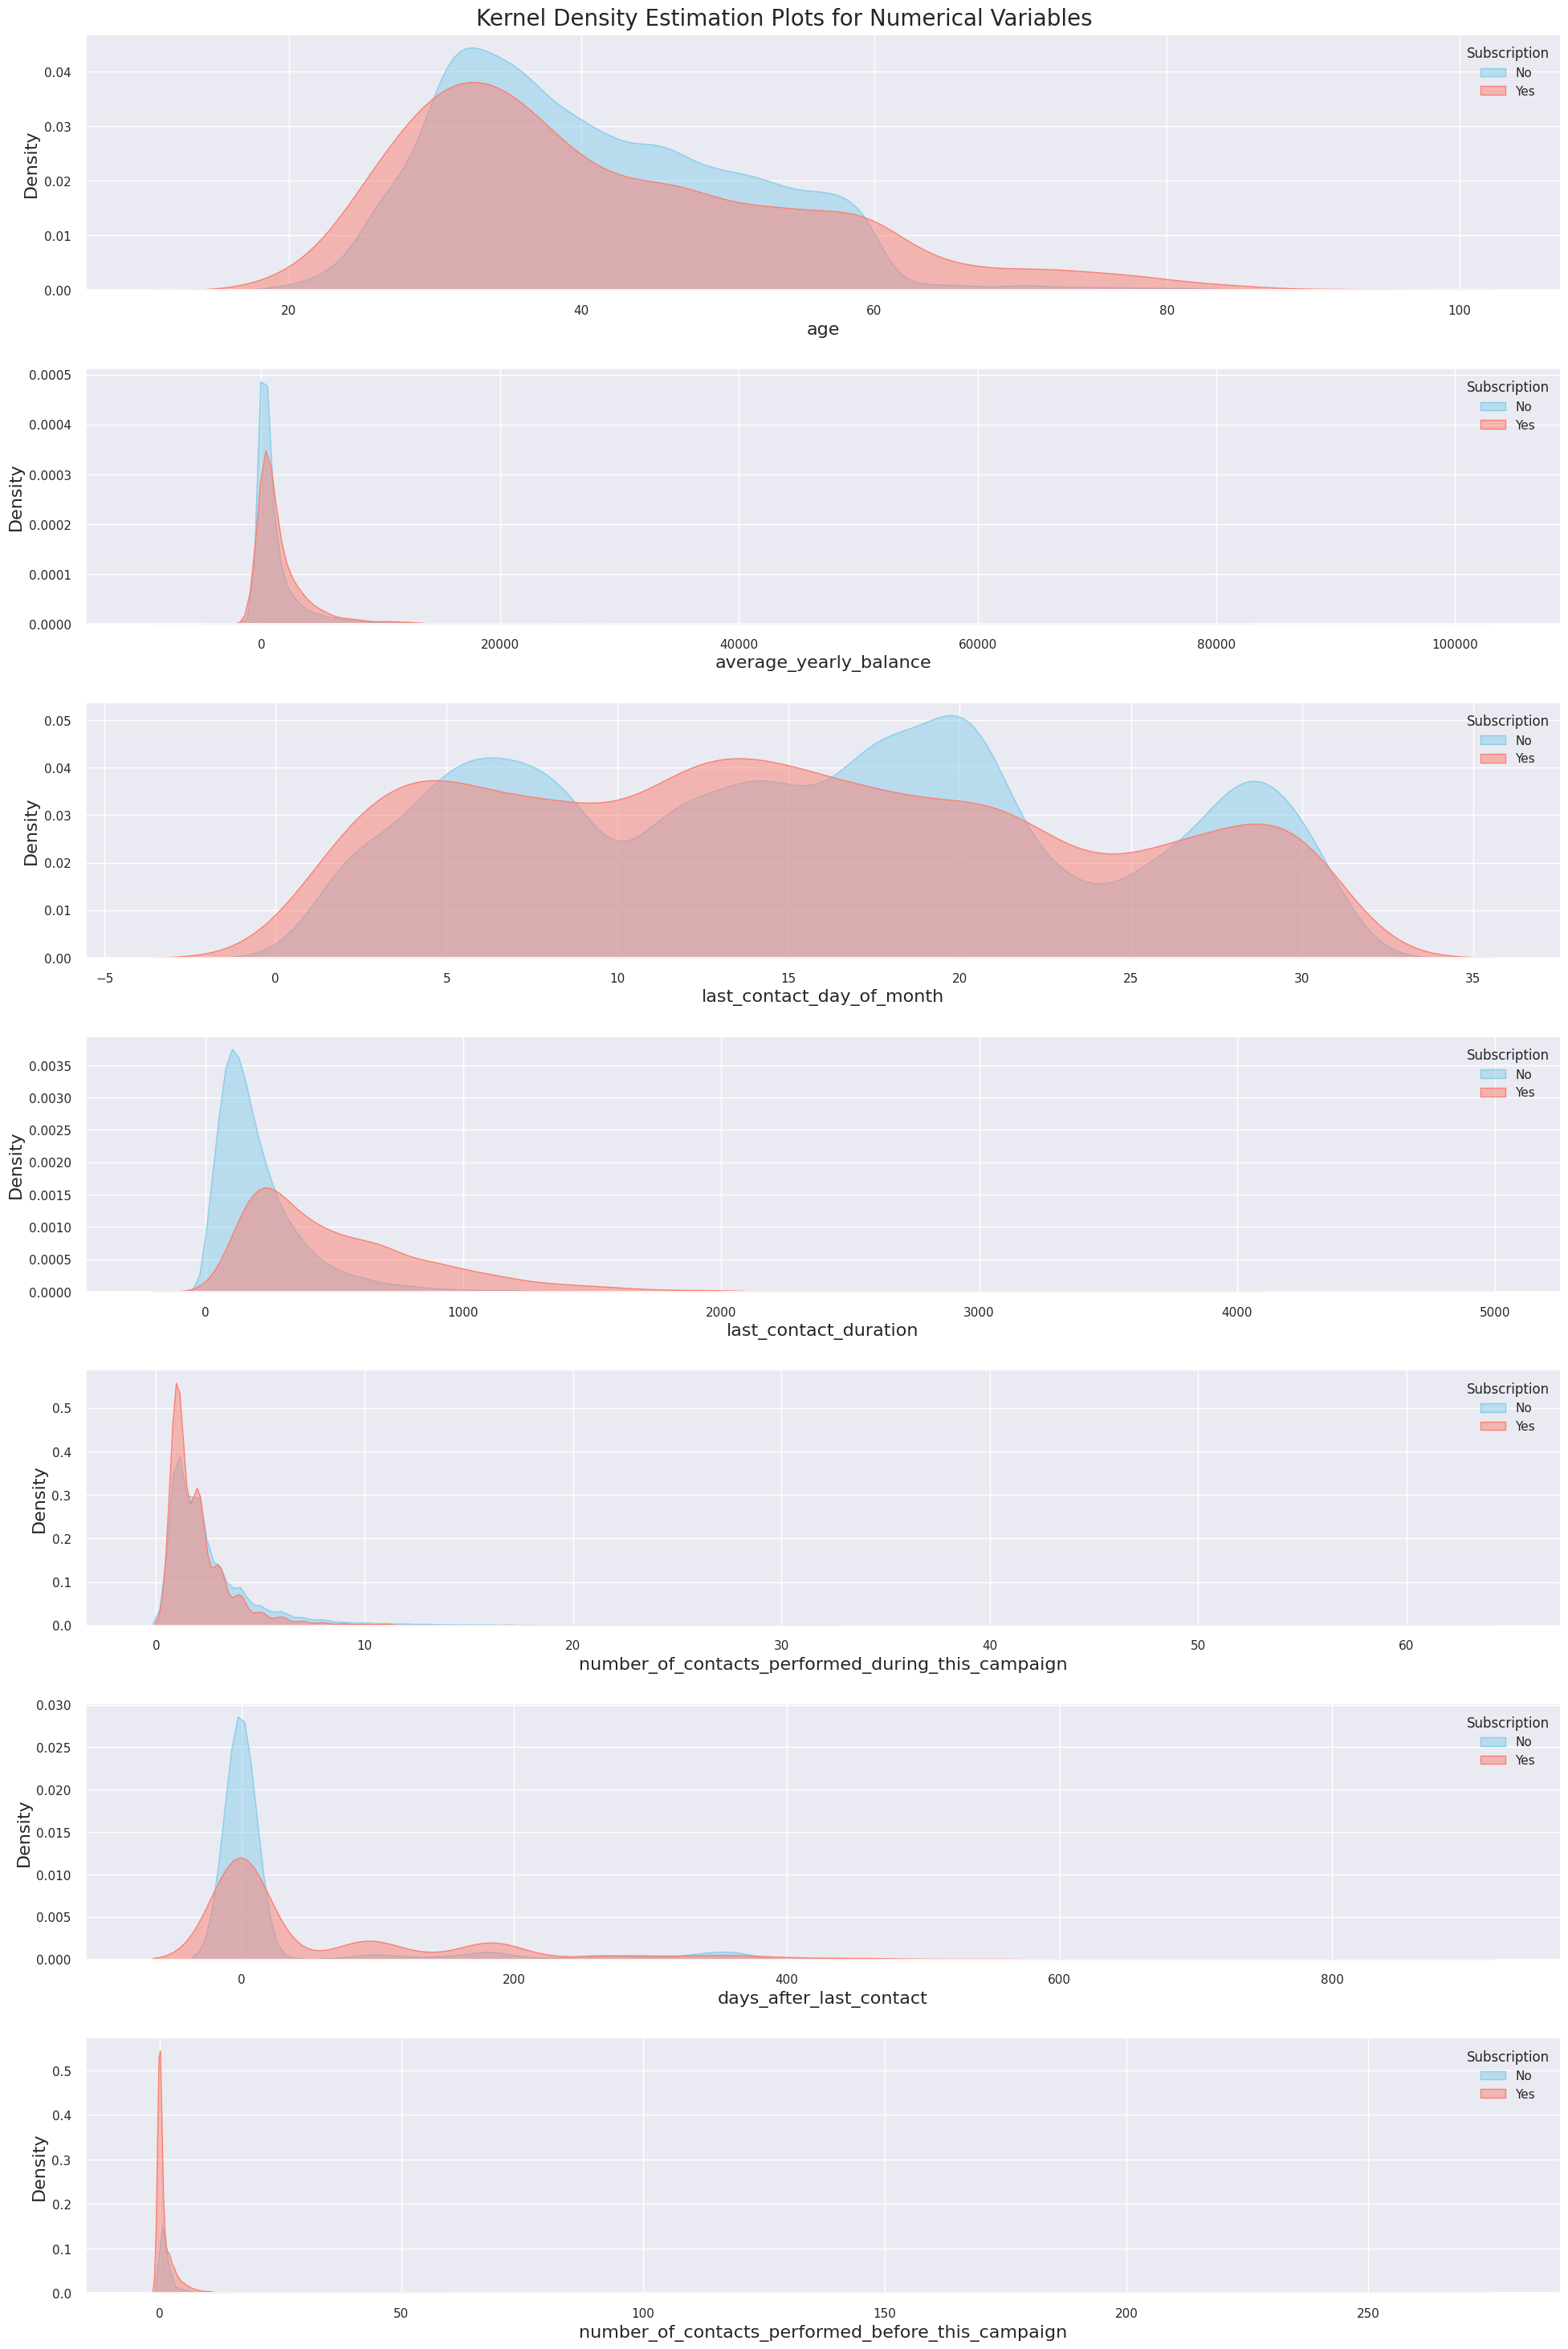

In [ ]:
# Plot the distribution of y by each numerical column
numerical_columns = df.select_dtypes(include=['int64'])
numerical_columns.columns

custom_palette = ["skyblue" , "salmon"]

fig, axes = plt.subplots(nrows=len(numerical_columns.columns), ncols=1, figsize=(20, 30), sharex=False, sharey=False)
fig.suptitle('Kernel Density Estimation Plots for Numerical Variables', fontsize=20)

for i, col in enumerate(numerical_columns.columns):
    for j, label in enumerate(df.subscription.unique()):
        subset = df[df.subscription == label]
        sns.set(style="darkgrid")
        sns.kdeplot(subset[col], ax=axes[i], color=custom_palette[j], fill=True, alpha=0.5)
    axes.flat[i].set_xlabel(col, fontsize=16)
    axes.flat[i].set_ylabel("Density", fontsize=16)
    axes.flat[i].legend(title="Subscription", loc='upper right', labels=['No', 'Yes'])
    sns.despine()

plt.tight_layout(pad=2)
plt.show()

From above visualization, we can inspect some interesting outcomes as below:
- among all values in "age" variable, age between 30-40 had the highest subscription ratio for both "Yes" and "No"
- among all values in "last-contact" variable, "20" had the highest subscription ratio for "No" and "13" had the highest subscription ratio for "Yes"

## Data Encoding

Here, we are using label encoding for the binary variables to change them from yes/no to 1/0.

In [ ]:
enc = LabelEncoder() #for binary variables

df["default_status"] = enc.fit_transform(df["default_status"])
df["housing_loan_status"] = enc.fit_transform(df["housing_loan_status"])
df["personal_loan_status"] = enc.fit_transform(df["personal_loan_status"])
df["subscription"] = enc.fit_transform(df['subscription'])

df.head()

,age,type_of_job,marital_status,education_level,default_status,average_yearly_balance,housing_loan_status,personal_loan_status,contact_type,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_contacts_performed_during_this_campaign,days_after_last_contact,number_of_contacts_performed_before_this_campaign,previous_campaign_outcome,subscription
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
1 - df['subscription'].mean()

0.8830151954170445

***From our dataset, 88.3% of people are not subscibed. This means that our model has to out-perform that metric in terms of accuracy to be considered successful.***

In [ ]:
len(df)

45211

In [ ]:
df['subscription'].sum()/ len(df)

0.11698480458295547

Here, we are using one hot encoding for categorical values. Since there is no inherant order to the values (job of "admin" is not inherantly larger or greater/less than "management"), label encoding would not be appropriate.

In [ ]:
categorical_columns = ['type_of_job', "marital_status", "education_level", "contact_type", "last_contact_month_of_year", "previous_campaign_outcome"]

df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,age,default_status,average_yearly_balance,housing_loan_status,personal_loan_status,last_contact_day_of_month,last_contact_duration,number_of_contacts_performed_during_this_campaign,days_after_last_contact,number_of_contacts_performed_before_this_campaign,...,last_contact_month_of_year_jun,last_contact_month_of_year_mar,last_contact_month_of_year_may,last_contact_month_of_year_nov,last_contact_month_of_year_oct,last_contact_month_of_year_sep,previous_campaign_outcome_failure,previous_campaign_outcome_other,previous_campaign_outcome_success,previous_campaign_outcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


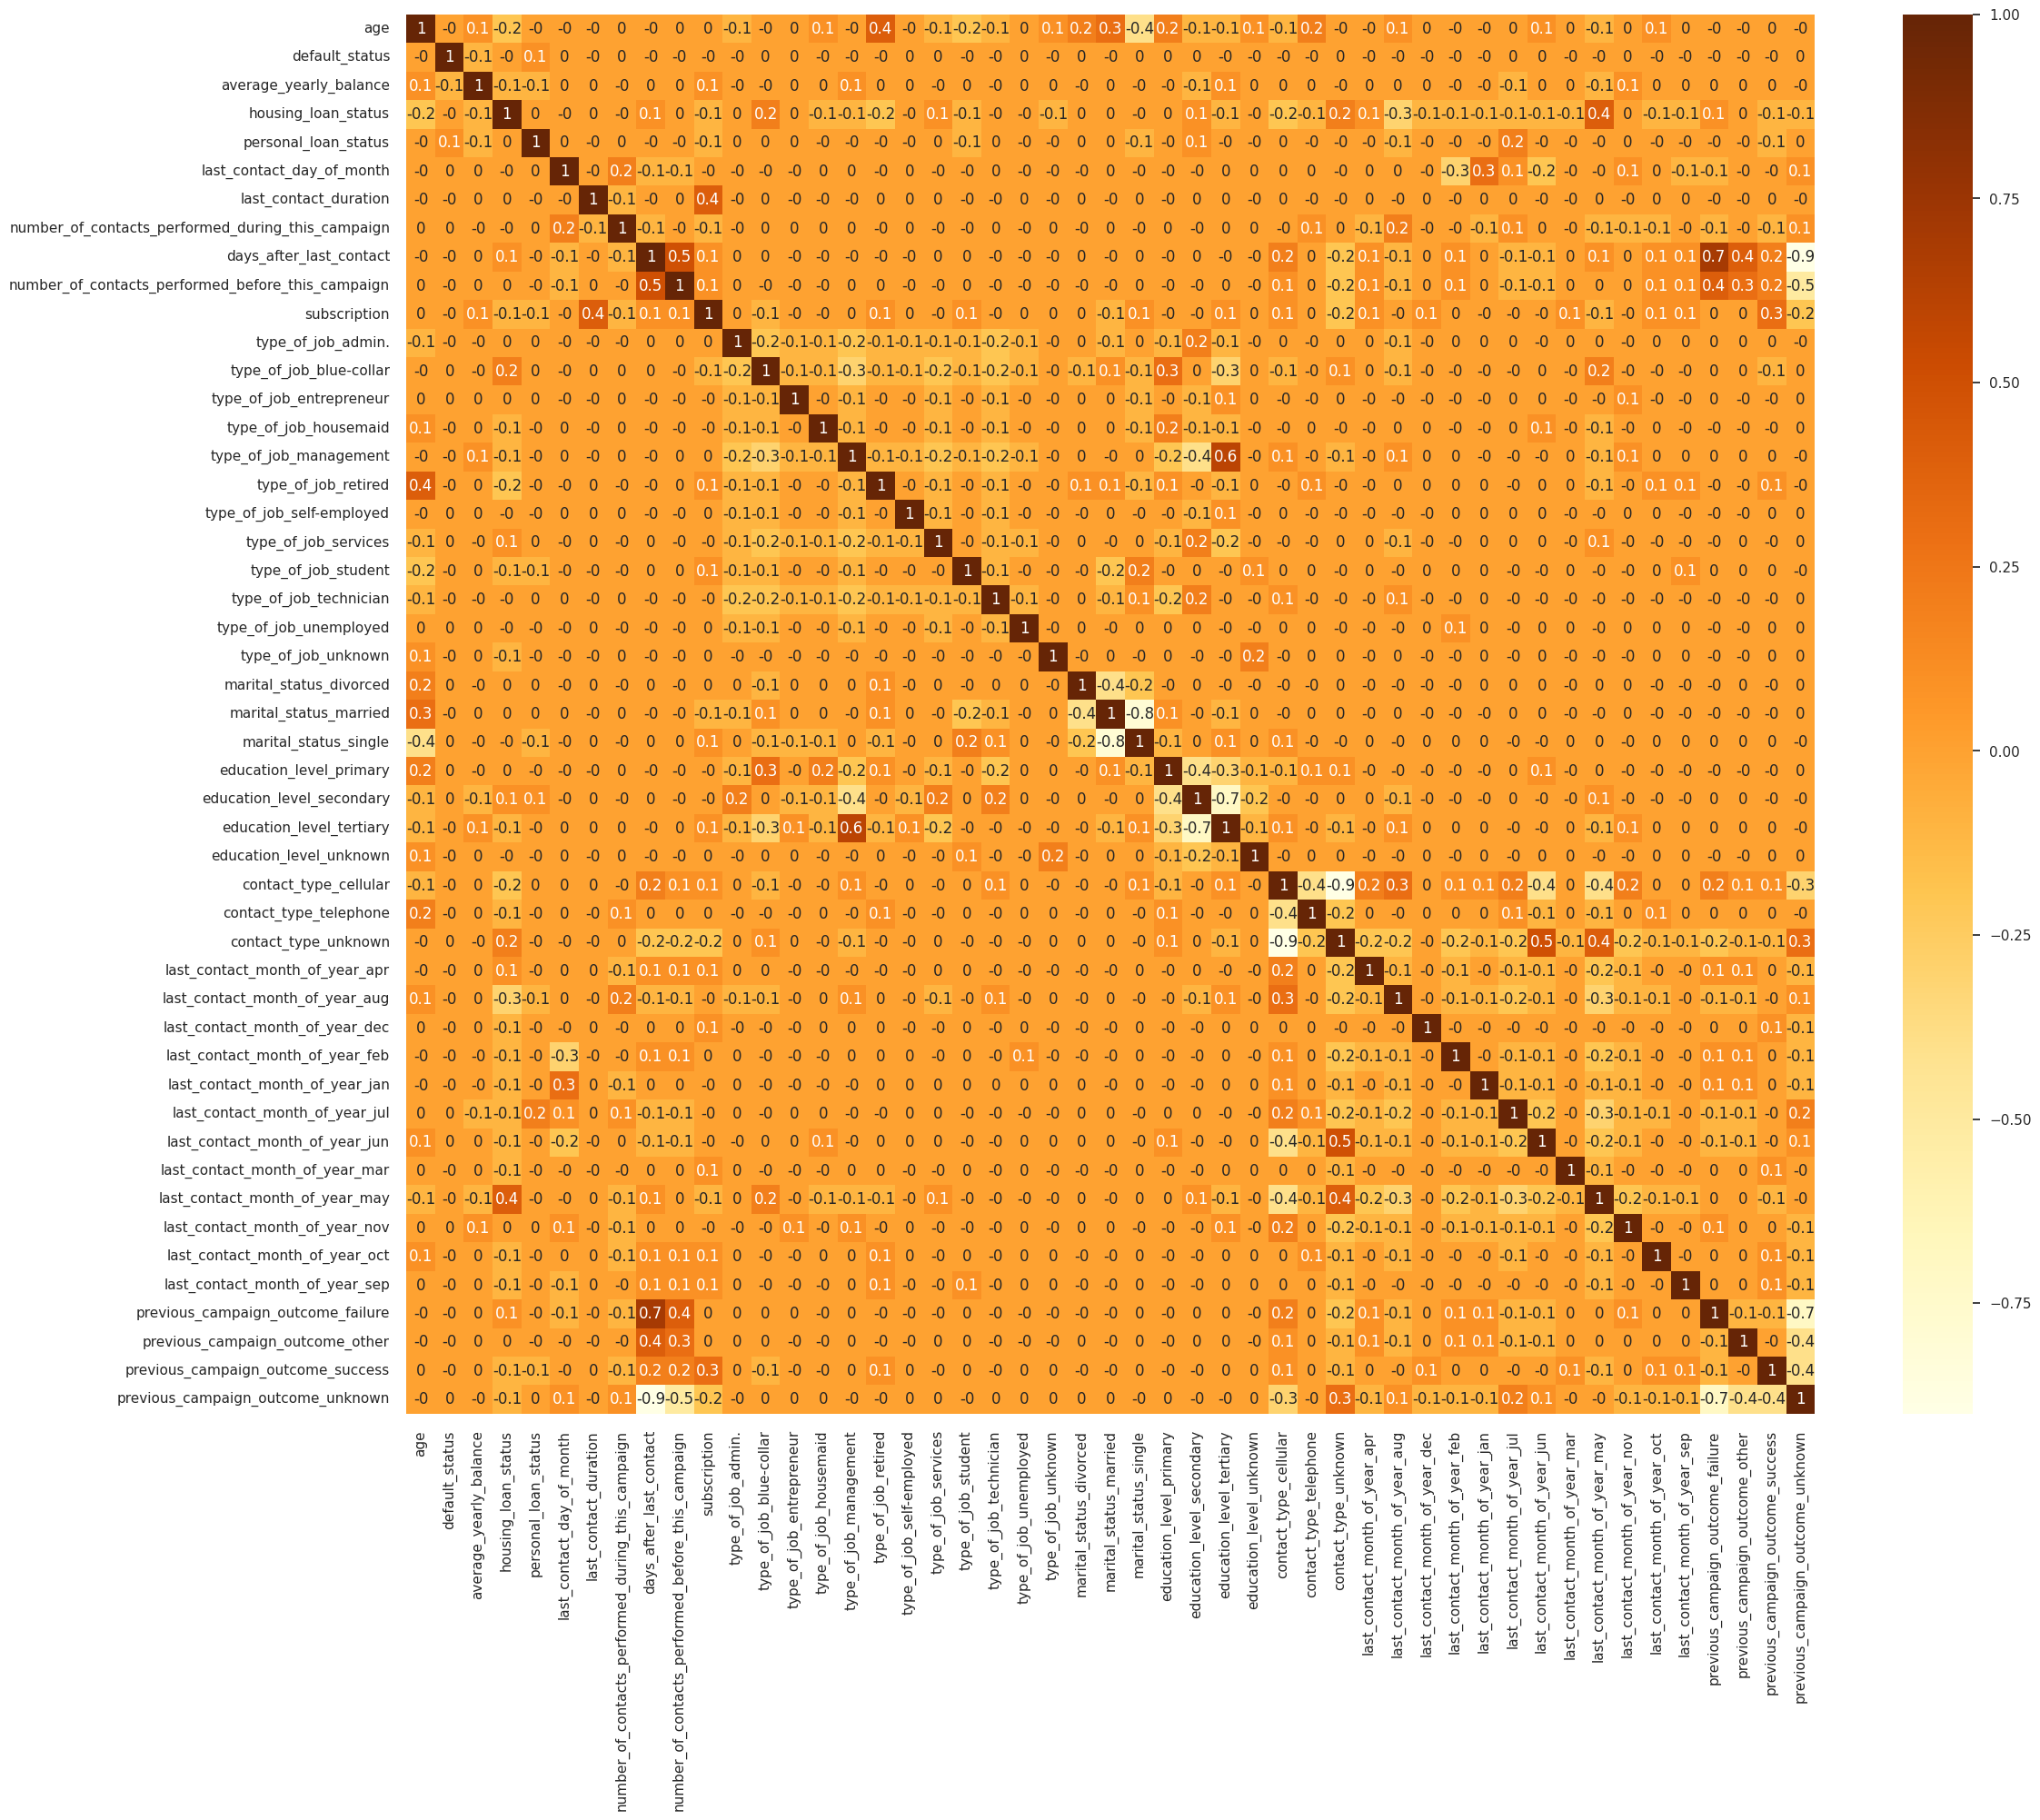

In [ ]:
# Correlation heatmap
corr = df_encoded.corr().round(1)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr');

When specifically looking at the subscription column, it does not seem to have any overly strong correlations with any of the variables.

Additionally, of most of the strong correlations showcased, most are things that are mutually exclusive. For example: martital_status_divorced and marital_status_married. Since there is only one value per column, it's impossible for someone to be both (in this dataset) so the correlation approaches -1.

## Train-Test split

In [ ]:
y = df_encoded[["subscription"]]
X = df_encoded.drop("subscription", axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

Below we are converting the continuous variables to standard scaler for better model performance.

The scaler is fit to the training data and then transforms the test data based on that fitting to avoid data leakage.

In [ ]:
continuous_vars = ['age', 'average_yearly_balance', 'last_contact_day_of_month', 'last_contact_duration', 'number_of_contacts_performed_during_this_campaign', 'days_after_last_contact', 'number_of_contacts_performed_before_this_campaign']

X_train_continuous = X_train[continuous_vars]
X_test_continuous = X_test[continuous_vars]

scaler = StandardScaler()

X_train[continuous_vars] = scaler.fit_transform(X_train_continuous)
X_test[continuous_vars] = scaler.transform(X_test_continuous)


In [ ]:
X_train.head()

,age,default_status,average_yearly_balance,housing_loan_status,personal_loan_status,last_contact_day_of_month,last_contact_duration,number_of_contacts_performed_during_this_campaign,days_after_last_contact,number_of_contacts_performed_before_this_campaign,...,last_contact_month_of_year_jun,last_contact_month_of_year_mar,last_contact_month_of_year_may,last_contact_month_of_year_nov,last_contact_month_of_year_oct,last_contact_month_of_year_sep,previous_campaign_outcome_failure,previous_campaign_outcome_other,previous_campaign_outcome_success,previous_campaign_outcome_unknown
3344,0.006515,0,-0.169381,1,0,-0.098218,-0.719756,-0.565886,-0.411364,-0.244772,...,0,0,1,0,0,0,0,0,0,1
17965,0.759937,0,0.017848,1,0,1.703422,0.047138,-0.245389,-0.411364,-0.244772,...,0,0,0,0,0,0,0,0,0,1
18299,0.100693,0,0.820681,0,0,1.823532,-0.493970,0.395606,-0.411364,-0.244772,...,0,0,0,0,0,0,0,0,0,1
10221,-0.370196,0,-0.489588,1,0,-0.578656,0.459781,2.639088,-0.411364,-0.244772,...,1,0,0,0,0,0,0,0,0,1
32192,1.419181,0,0.706889,0,0,-0.098218,0.027674,-0.245389,-0.411364,-0.244772,...,0,0,0,0,0,0,0,0,0,1


# Model Development & Testing

## Logistic Regression Model

In [ ]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)
predicted = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8989273471193188

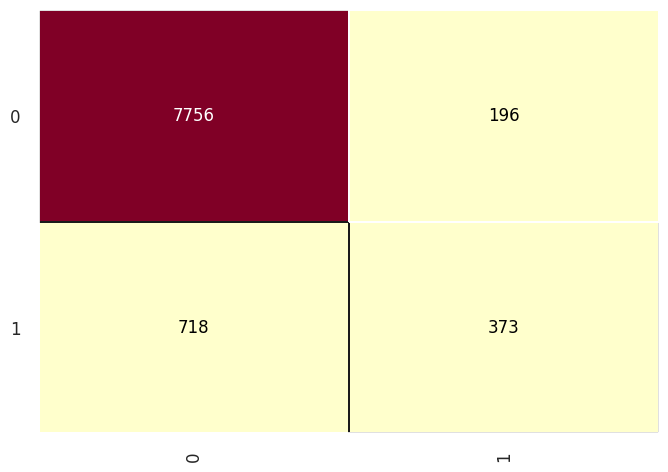

In [ ]:
cm = ConfusionMatrix(logistic_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_rep = classification_report(y_test, predicted)

print("Classification Report for Logistic Regression:")
print(classification_rep)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.66      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



## LDA Model

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
predicted = LDA.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.8974897710936636

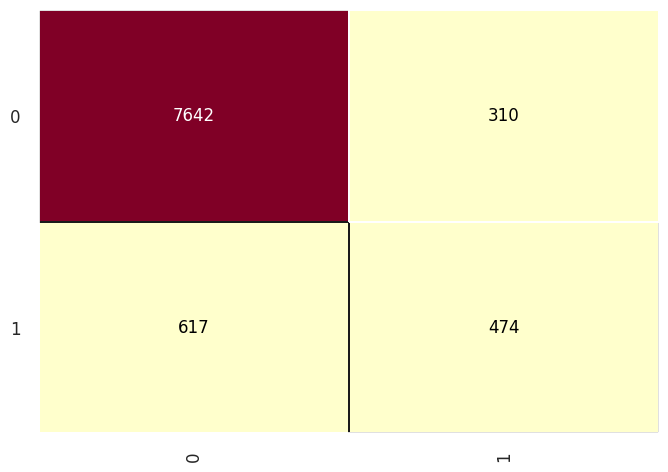

In [ ]:
cm = ConfusionMatrix(LDA)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_rep = classification_report(y_test, predicted)

print("Classification Report for LDA:")
print(classification_rep)

Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7952
           1       0.60      0.43      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.70      0.72      9043
weighted avg       0.89      0.90      0.89      9043



## QDA Model

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
predicted = QDA.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.732057945372111

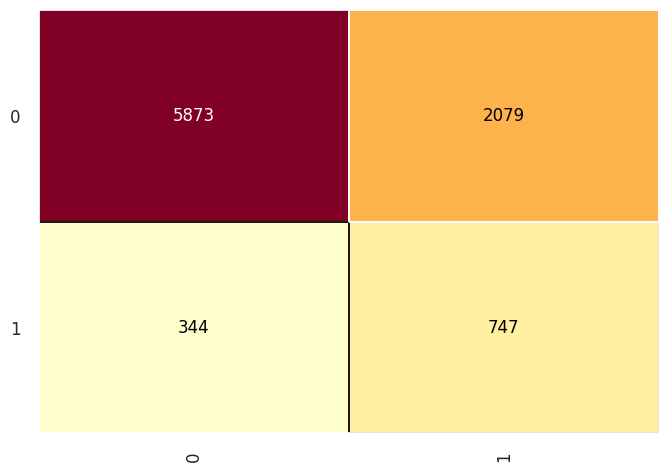

In [ ]:
cm = ConfusionMatrix(QDA)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_rep = classification_report(y_test, predicted)

print("Classification Report for QDA:")
print(classification_rep)

Classification Report for QDA:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      7952
           1       0.26      0.68      0.38      1091

    accuracy                           0.73      9043
   macro avg       0.60      0.71      0.61      9043
weighted avg       0.86      0.73      0.77      9043



## Decision Tree

In [ ]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
predicted = Tree.predict(X_test)

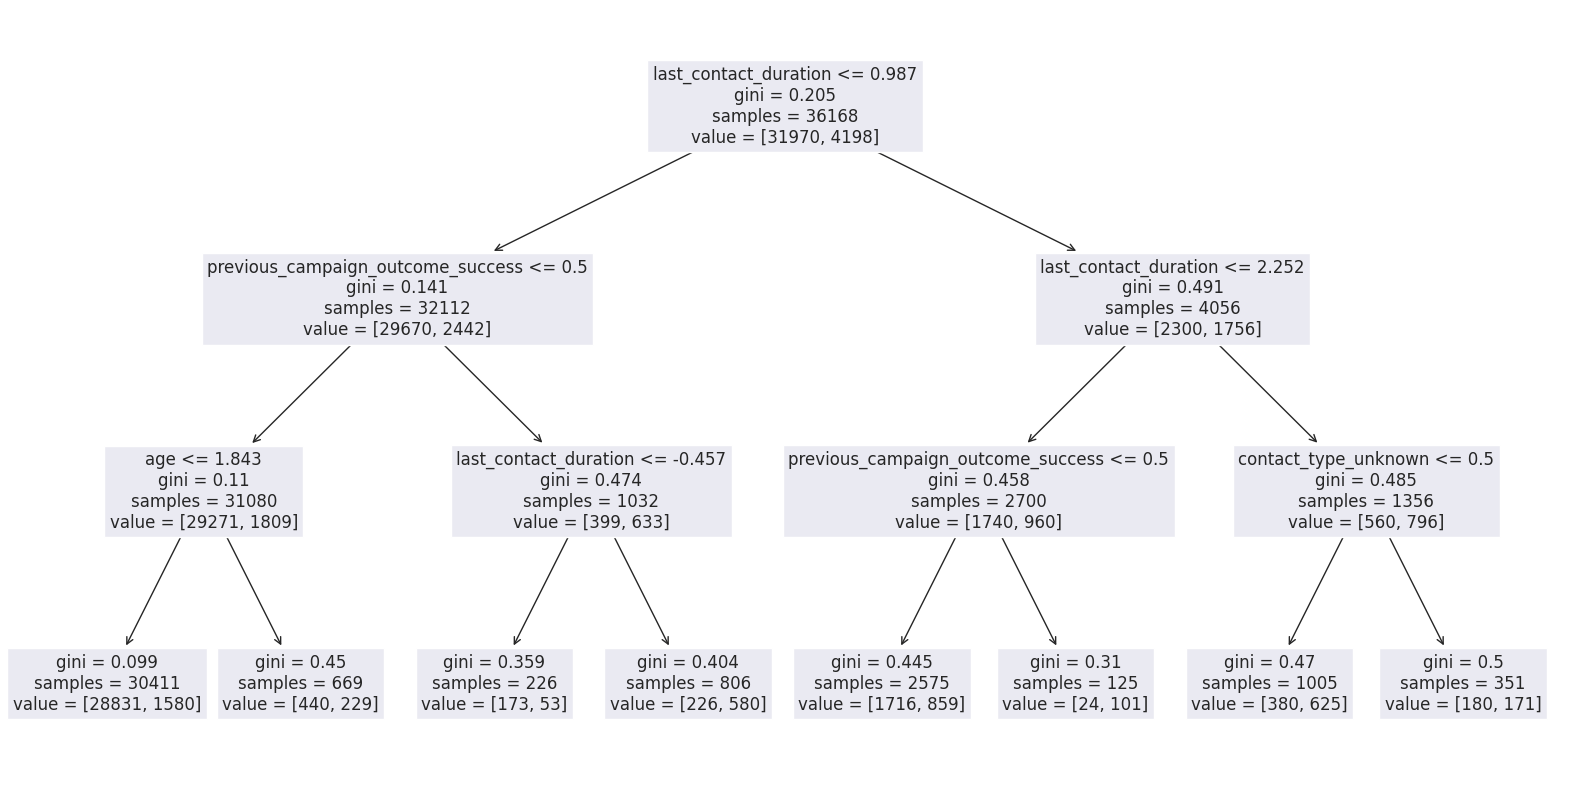

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
plot_tree(model, ax=ax, feature_names=X_train.columns,fontsize=12);
fig.show()

If we plot our decision tree model, we can see:
- last_contact_duration is the most important variable since it's on the top of the tree and it's been splited the most.

- First split for values of variable last_contact_duration\\

- Second left split for values of variable previous_campaign_outcome_success\\

- Second right split for values of variable last_contact_duration\\


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.875704965166427

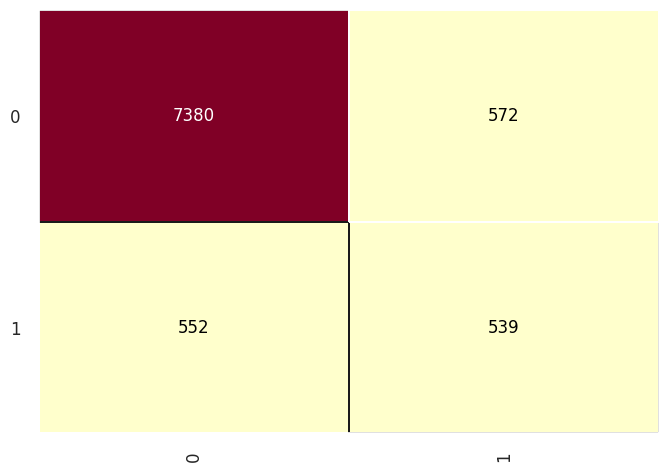

In [ ]:
cm = ConfusionMatrix(Tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_rep = classification_report(y_test, predicted)

print("Classification Report for Decision Tree Classifier:")
print(classification_rep)

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.49      0.49      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Forest = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
Forest.fit(X_train, y_train)
predicted = Forest.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
oob_accuracy = Forest.oob_score_
print("Accuracy:", accuracy)
print("OOB Accuracy:", oob_accuracy)

<ipython-input-30-2d38d9d8fe3e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Forest.fit(X_train, y_train)


Accuracy: 0.9042353201371226
OOB Accuracy: 0.9055795178057952


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9042353201371226

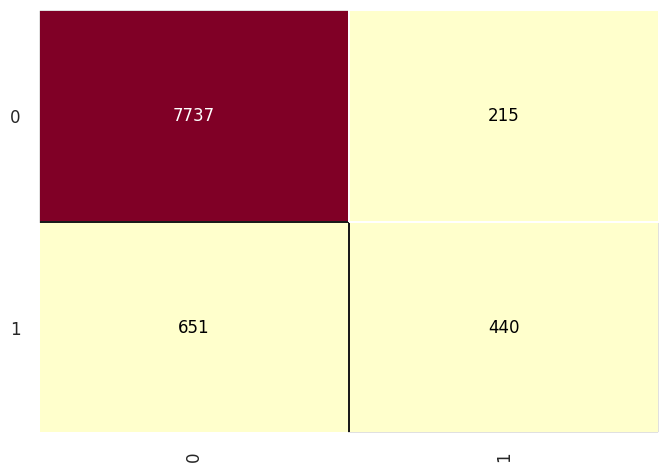

In [ ]:
cm = ConfusionMatrix(Forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_rep = classification_report(y_test, predicted)

print("Classification Report for Random Forest Classifier:")
print(classification_rep)

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



## Cross Validation

"X" is not scaled, while it is in all test and training sets. Here we are scaling it based off of the training data, similar to previously. It's best practice to do so before we cross validate.

In [ ]:
continuous_vars = ['age', 'average_yearly_balance', 'last_contact_day_of_month', 'last_contact_duration', 'number_of_contacts_performed_during_this_campaign', 'days_after_last_contact', 'number_of_contacts_performed_before_this_campaign']
X_scaled = X.sample(frac=1, random_state=42) #shuffle the data to make sure it's in random order to be select
y_shuffled = y.sample(frac=1, random_state=42) #shuffle the data to make sure it's in random order to be select
X_continuous = X_scaled[continuous_vars]
X_continuous_scaled = scaler.fit_transform(X_continuous)
X_scaled[continuous_vars] = X_continuous_scaled

In [ ]:
warnings.filterwarnings("ignore") #there are quite a few warnings when we run the code, this is just to clean up the output.

models = [Tree, LDA, QDA, logistic_model, Forest]
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
results = []

for model in models:
    cv_scores = cross_validate(model, X_scaled, y_shuffled, cv=5, scoring=scoring_metrics)
    results.append({'Model': model.__class__.__name__,
                    'Mean Accuracy': cv_scores['test_accuracy'].mean(),
                    'Mean Precision': cv_scores['test_precision'].mean(),
                    'Mean Recall': cv_scores['test_recall'].mean(),
                    'Mean F1': cv_scores['test_f1'].mean()})

results_df = pd.DataFrame(results)
results_df

,Model,Mean Accuracy,Mean Precision,Mean Recall,Mean F1
0,DecisionTreeClassifier,0.876446,0.472515,0.481565,0.476988
1,LinearDiscriminantAnalysis,0.900246,0.601217,0.437509,0.506442
2,QuadraticDiscriminantAnalysis,0.714030,0.253465,0.716391,0.373069
3,LogisticRegression,0.901241,0.646493,0.343729,0.448800
4,RandomForestClassifier,0.906218,0.671420,0.390243,0.493310


The robustness of each model's classification performance is further affirmed by the results of a five-fold cross-validation. We observe that the mean accuracy of each model closely aligns with the above findings, with Logistic Regression, LDA and Random Forest models achieving approximately 90% accuracy.

It is noted that the Logistic Regression model and the Random Forest model slightly outperform the LDA model on average. While the differences in accuracy between these three models are marginal, the LDA model achieves a higher average f1-score compared to the other two, indicating overall better precision and recall (sensitivity). Given the highly imbalanced class distribution of our target variable, the f1-score might provide a more comprehensive evaluation of the model's performance by considering both false positives and false negatives. Therefore, it is reasonable for us to suggest that the LDA model performs the best in overall.

In [ ]:
# Checking the result correctness of the above CV function with K-Fold function

kf = KFold(n_splits=5, random_state=42, shuffle=True)

continuous_vars = ['age', 'average_yearly_balance', 'last_contact_day_of_month', 'last_contact_duration', 'number_of_contacts_performed_during_this_campaign', 'days_after_last_contact', 'number_of_contacts_performed_before_this_campaign']
scaler = StandardScaler()
accuracy_scores_logistic = []
accuracy_scores_LDA = []
accuracy_scores_QDA = []
accuracy_scores_Tree = []
accuracy_scores_Forest = []

for i, (tr_index, te_index) in enumerate(kf.split(X)):
    print(f"Fold {i+1}:")
    X_tr, X_te = X.iloc[tr_index], X.iloc[te_index]
    y_tr, y_te = y.iloc[tr_index], y.iloc[te_index]

    X_tr[continuous_vars] = scaler.fit_transform(X_tr[continuous_vars])
    X_te[continuous_vars] = scaler.transform(X_te[continuous_vars])

    logistic_model.fit(X_tr, y_tr)
    predicted_logistic = logistic_model.predict(X_te)
    accuracy_logistic = accuracy_score(y_te, predicted_logistic)
    accuracy_scores_logistic.append(accuracy_logistic)

    LDA.fit(X_tr, y_tr)
    predicted_LDA = LDA.predict(X_te)
    accuracy_LDA = accuracy_score(y_te, predicted_LDA)
    accuracy_scores_LDA.append(accuracy_LDA)

    QDA.fit(X_tr, y_tr)
    predicted_QDA = QDA.predict(X_te)
    accuracy_QDA = accuracy_score(y_te, predicted_QDA)
    accuracy_scores_QDA.append(accuracy_QDA)

    Tree.fit(X_tr, y_tr)
    predicted_Tree = Tree.predict(X_te)
    accuracy_Tree = accuracy_score(y_te, predicted_Tree)
    accuracy_scores_Tree.append(accuracy_Tree)

    Forest.fit(X_tr, y_tr)
    predicted_Forest = Forest.predict(X_te)
    accuracy_Forest = accuracy_score(y_te, predicted_Forest)
    accuracy_scores_Forest.append(accuracy_Forest)

    print(f"Logistic accuracy: {accuracy_logistic:.4f}")
    print(f"LDA accuracy: {accuracy_LDA:.4f}")
    print(f"QDA accuracy: {accuracy_QDA:.4f}")
    print(f"Decision Tree accuracy: {accuracy_Tree:.4f}")
    print(f"Random Forest accuracy: {accuracy_Forest:.4f} \n")

print("Mean accuracy of ten-fold cross validation: \n")
print(f"Logistic: {np.mean(accuracy_scores_logistic):.4f}")
print(f"LDA: {np.mean(accuracy_scores_LDA):.4f}")
print(f"QDA: {np.mean(accuracy_scores_QDA):.4f}")
print(f"Decision Tree: {np.mean(accuracy_scores_Tree):.4f}")
print(f"Random Forest: {np.mean(accuracy_scores_Forest):.4f}")

Fold 1:
Logistic accuracy: 0.8988
LDA accuracy: 0.8975
QDA accuracy: 0.6514
Decision Tree accuracy: 0.8764
Random Forest accuracy: 0.9045 

Fold 2:
Logistic accuracy: 0.9018
LDA accuracy: 0.9015
QDA accuracy: 0.8197
Decision Tree accuracy: 0.8736
Random Forest accuracy: 0.9063 

Fold 3:
Logistic accuracy: 0.8979
LDA accuracy: 0.8985
QDA accuracy: 0.7619
Decision Tree accuracy: 0.8712
Random Forest accuracy: 0.9017 

Fold 4:
Logistic accuracy: 0.9046
LDA accuracy: 0.9012
QDA accuracy: 0.7675
Decision Tree accuracy: 0.8757
Random Forest accuracy: 0.9090 

Fold 5:
Logistic accuracy: 0.9030
LDA accuracy: 0.9026
QDA accuracy: 0.5909
Decision Tree accuracy: 0.8782
Random Forest accuracy: 0.9043 

Mean accuracy of ten-fold cross validation: 

Logistic: 0.9012
LDA: 0.9002
QDA: 0.7183
Decision Tree: 0.8750
Random Forest: 0.9052


The scores obtained from the K-Fold function align with the results using the cross-validation function.

## Potential Enhancement

### Hyper-Parameter Tuning

In [ ]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solver for LDA
    'shrinkage': ['auto', None]  # Shrinkage parameter
}

grid_search = GridSearchCV(LDA, param_grid, cv=5, verbose=False)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'shrinkage': None, 'solver': 'svd'}
Best Score: 0.9017364083404018


In [ ]:
default_hyperparams = LDA.get_params()
default_hyperparams

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

Based on the above grid search, the default hyper-parameters are actually the best hyper parameters {'shrinkage': None, 'solver': 'svd'} for the LDA model. Since that is the case, there is no need for changes to the creation of the model itself.

## Model Coefficients

In [ ]:
coefficients = LDA.coef_[0]
variable_names = X_train.columns

coefficients_df = pd.DataFrame({'Explanatory Variable': variable_names, 'Coefficient': coefficients})

coefficients_df = coefficients_df.sort_values(by = 'Coefficient', ascending = False).reset_index(drop=True)
coefficients_df.head(20)

,Explanatory Variable,Coefficient
0,previous_campaign_outcome_success,5.375158
1,last_contact_month_of_year_mar,4.456583
2,last_contact_month_of_year_sep,2.736090
3,last_contact_month_of_year_oct,2.318379
4,last_contact_month_of_year_dec,2.315816
5,last_contact_duration,1.653173
6,type_of_job_student,1.074125
7,last_contact_month_of_year_jun,0.648838
8,type_of_job_retired,0.541465
9,contact_type_cellular,0.537955


# Conclusion

Based on our findings, we concluded that the LDA model was the best for achieving our objectives.

While it's accuracy (0.900246) is marginally lower than that of Logistic Regression (0.901241) and Random Forest (0.906218), its recall for clients that choose to subscribe (0.437509) is better than that of Logistic Regression (0.343729) and Random Forest (0.390243). Since our initial objective was to identify the most effective model for predicting successful client subscriptions in response to direct marketing campaigns, we prioritized recall as our primary evaluation metric. As recall emphasizes capturing true positive results, it is particularly crucial in our marketing context. A higher recall ensures that our model effectively identifies individuals who are likely to make a purchase, thus maximizing our opportunities for successful marketing engagements. Additionally, we are given information on what specifically leads to unsuccessful marketing engagements.

Since both the QDA and Decision tree models had an accuracy score of less than 0.88, they are not viable options as they are worse than the underlying distribution of subscriptions vs non-subscriptions where non-subscribers make up 88% of the dataset.





## Recommendations

Based on our findings, we would make the following recommendations to the marketing department of the Portugese Bank:

*   Previous campaign success is the strongest predictor of if a new campaign will also lead a client to subscribe. These customers are likely to be power-users or evangelists and should be contacted first.
*   Clients who were last contacted in March, September, October, or December are far more likely to sign up for a subscription.
  * Unfortunately, there is little information on *why* this is the case and this should be investigated further to understand the pattern.
  * Clients who were last contacted
* If the prospective clients are retirees or students, they are far more likely be subscribe to term bank deposits. These may be the target market that is best suited to this product.
* If the last method the client was reached was by telephone or cellular phone, they are drastically more likely to subscribe. Those whose previous contact type was unknown are unlikely to subscribe.


The marketing department should actively avoid prospective clients who:
* Were last contacted in January, July, August, or November.
* Had unsuccessful or unknown responses to previous campaigns.
* Have a housing loan.
* Have a personal loan.

# References

Moro, Sérgio & Cortez, Paulo & Laureano, Raul. (2011). Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. Proceedings of the European Simulation and Modelling Conference.

Openml. (n.d.). Retrieved January 28, 2024, from https://www.openml.org/search?type=data&sort=runs&id=1461&status=active
